# Predicting Churn

In [1]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
merchant_churn_data = pd.read_csv("merchant_churn_data.csv")

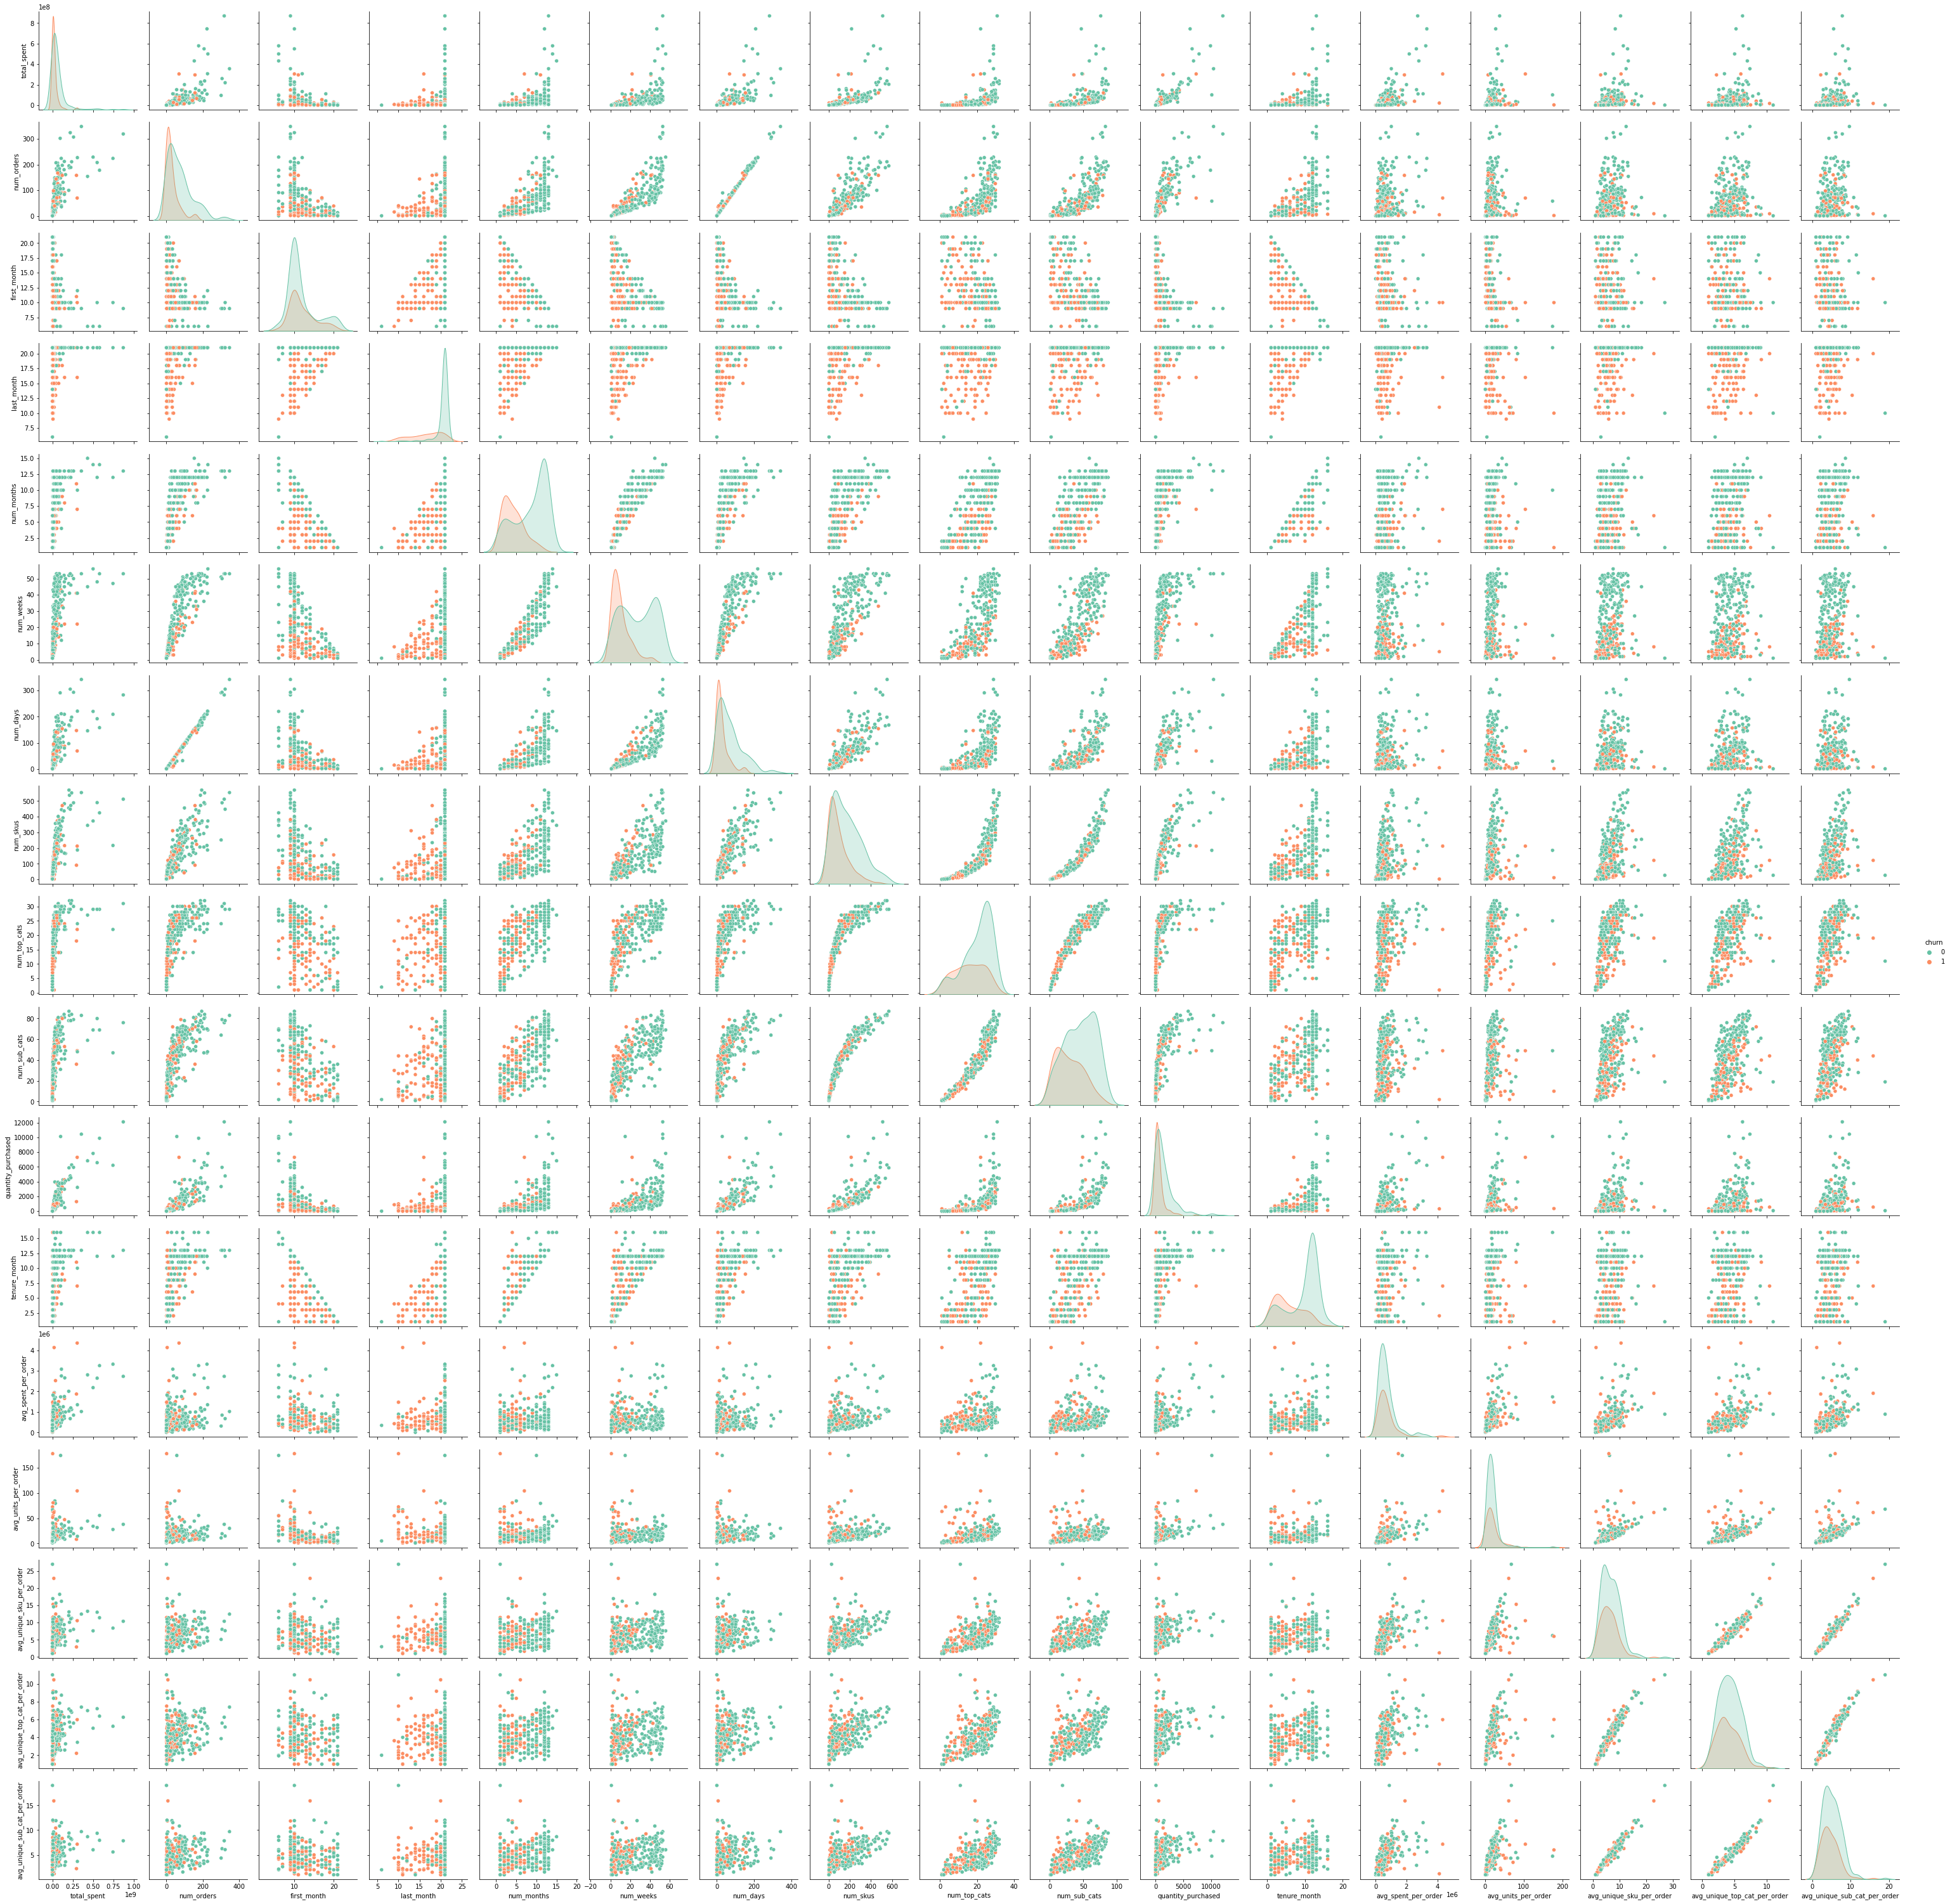

In [3]:
sns.pairplot(merchant_churn_data.drop(columns=["merchant_id"]), hue="churn", palette="Set2")

In [19]:
merchant_churn_data.head()

,merchant_id,total_spent,num_orders,first_month,last_month,num_months,num_weeks,num_days,num_skus,num_top_cats,num_sub_cats,quantity_purchased,tenure_month,avg_spent_per_order,avg_units_per_order,avg_unique_sku_per_order,avg_unique_top_cat_per_order,avg_unique_sub_cat_per_order,churn
0,1,3462500.0,11,13,21,4,6,8,29,11,18,43,9,314772.727273,3.909091,3.000000,2.545455,2.727273,1
1,2,5030500.0,7,12,21,3,6,7,31,12,19,58,10,718642.857143,8.285714,4.428571,3.428571,3.714286,0
2,3,10558000.0,29,11,16,5,10,22,101,23,42,345,6,364068.965517,11.896552,4.724138,3.551724,4.034483,1
3,4,1021000.0,2,19,20,2,2,2,9,5,5,11,2,510500.000000,5.500000,5.500000,3.000000,3.000000,1
4,5,908500.0,2,13,18,2,2,2,11,6,9,11,6,454250.000000,5.500000,5.500000,3.500000,4.500000,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics

from datetime import date, datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import joblib


In [5]:
merchant_churn_data.reset_index()
merchant_attributes = merchant_churn_data.drop(columns=["merchant_id","churn"])
churn_label = merchant_churn_data["churn"]
X_train, X_test, y_train, y_test = train_test_split(
    merchant_attributes, churn_label, test_size=0.33, random_state=7)

In [15]:
clf = DecisionTreeClassifier(criterion= "entropy", random_state=0,max_depth=4)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
cv_score = cross_val_score(clf, X_train, y_train, cv=10)

In [16]:
score,cv_score

(0.8532110091743119,
 array([0.81818182, 0.81818182, 0.95454545, 0.77272727, 0.95454545,
        0.86363636, 0.68181818, 0.81818182, 0.86363636, 0.77272727]))

/Users/yingli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


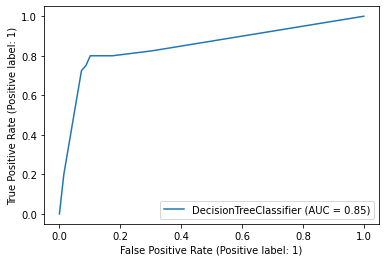

In [17]:
metrics.plot_roc_curve(clf, X_test, y_test)

[Text(0.5, 0.9, 'X[3] <= 20.5\nentropy = 0.917\nsamples = 220\nvalue = [147, 73]'),
 Text(0.29545454545454547, 0.7, 'X[11] <= 10.5\nentropy = 0.838\nsamples = 86\nvalue = [23, 63]'),
 Text(0.18181818181818182, 0.5, 'X[1] <= 1.5\nentropy = 0.717\nsamples = 76\nvalue = [15, 61]'),
 Text(0.09090909090909091, 0.3, 'X[10] <= 3.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.045454545454545456, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.13636363636363635, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2727272727272727, 0.3, 'X[14] <= 3.986\nentropy = 0.627\nsamples = 70\nvalue = [11, 59]'),
 Text(0.22727272727272727, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.3181818181818182, 0.1, 'entropy = 0.729\nsamples = 54\nvalue = [11, 43]'),
 Text(0.4090909090909091, 0.5, 'X[5] <= 11.5\nentropy = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(0.36363636363636365, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.45454545454545453, 

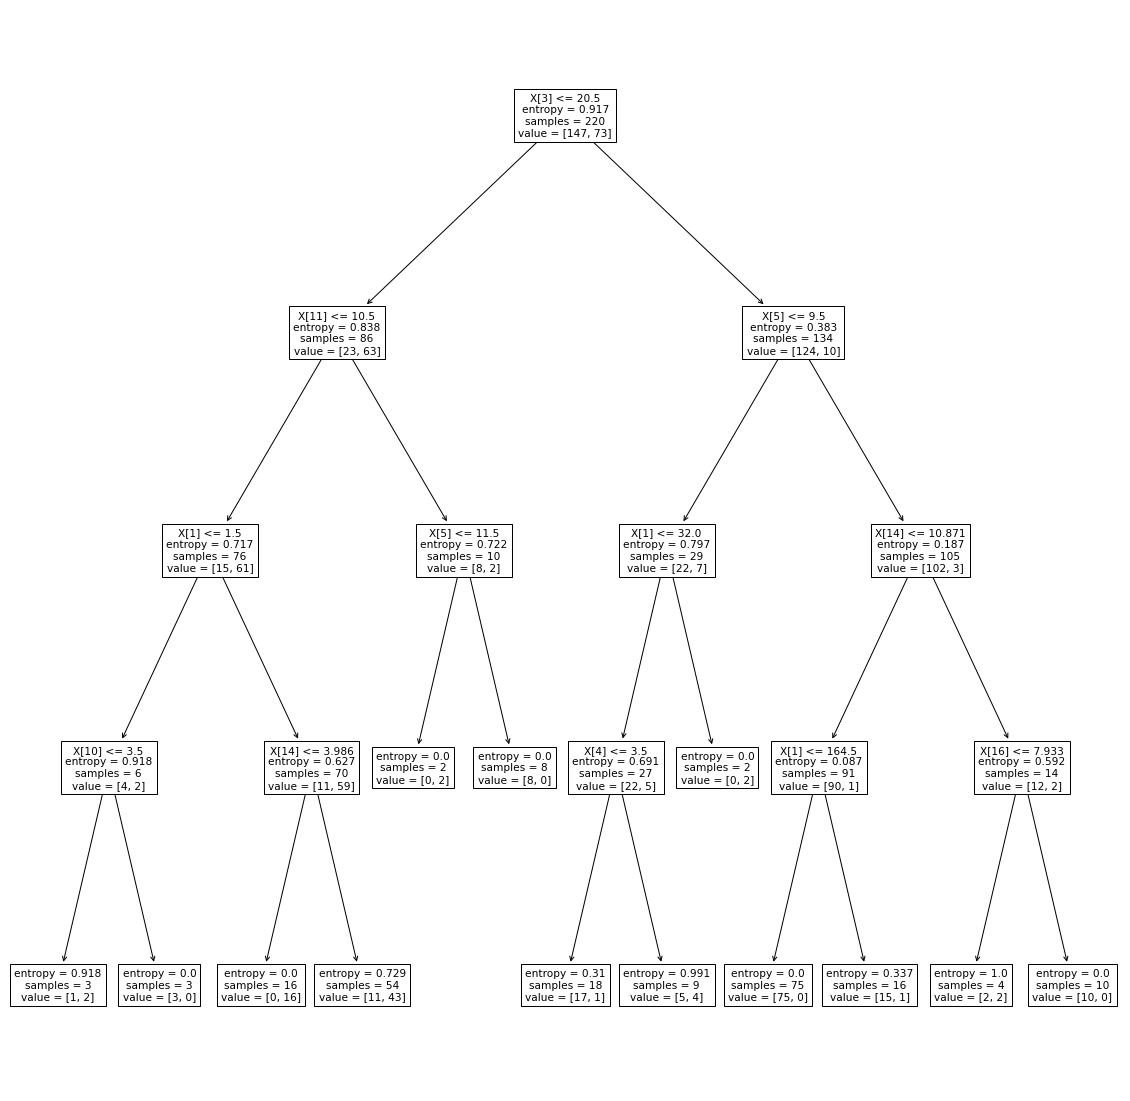

In [18]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.export_text(clf)
tree.plot_tree(clf)